# **Project Title:-** Grapes to Greatness: Machine Learning in Wine Quality Prediction

## Importing the Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data preprocessing including visualization

Knowing rows and columns about the Dataset

In [ ]:
df.shape

(1599, 12)

Checking for any null values

In [ ]:
df.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Descriptive Statistics of Dataset

In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Correlation

In [ ]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
df.corr().quality.sort_values(ascending = False)        #Dependent variables with target variables

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

  Univariate Analysis

<Axes: xlabel='pH', ylabel='Count'>

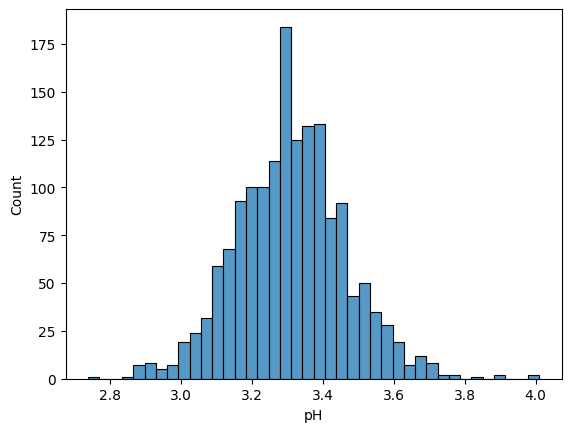

In [ ]:
sns.histplot(df.pH)

<ipython-input-58-8b271c44c149>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sulphates)


<Axes: xlabel='sulphates', ylabel='Density'>

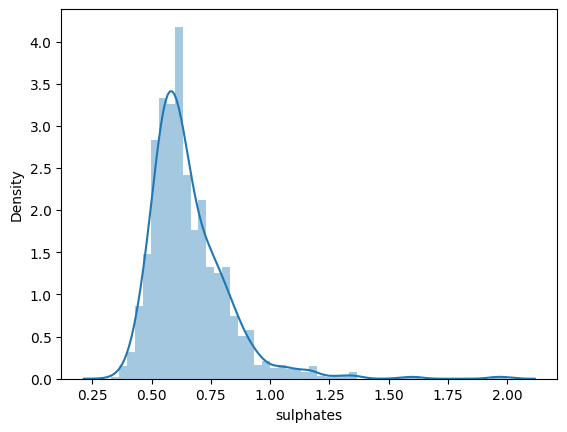

In [ ]:
sns.distplot(df.sulphates)

<ipython-input-59-cc0e16fd78a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

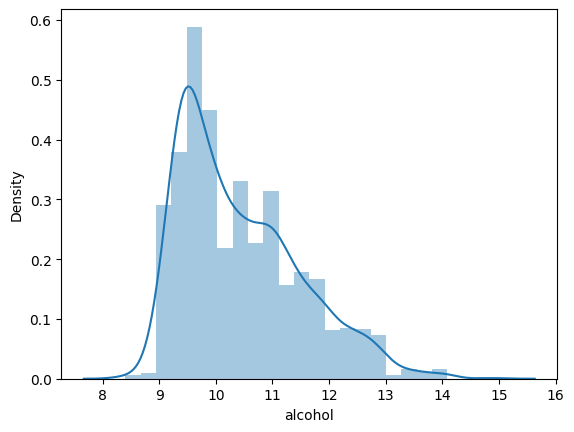

In [ ]:
sns.distplot(df.alcohol)

Bivariate Analysis

<Axes: xlabel='sulphates', ylabel='pH'>

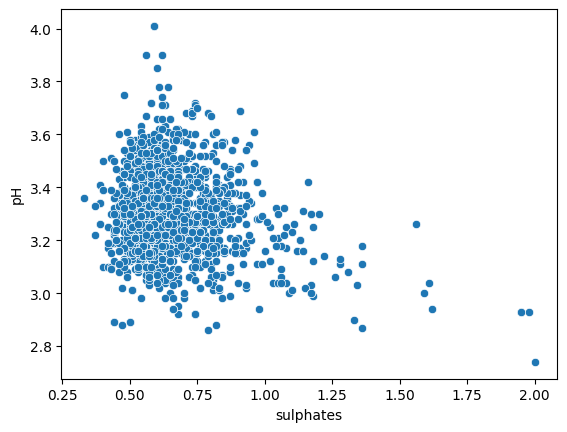

In [ ]:
sns.scatterplot(x=df.sulphates, y=df.pH)

<Axes: xlabel='chlorides', ylabel='pH'>

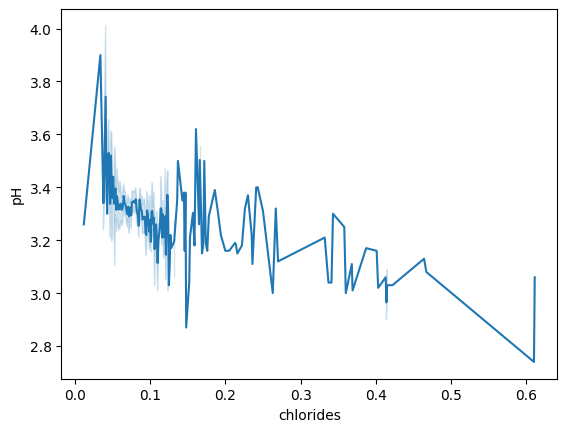

In [ ]:
sns.lineplot(x=df.chlorides, y=df.pH)

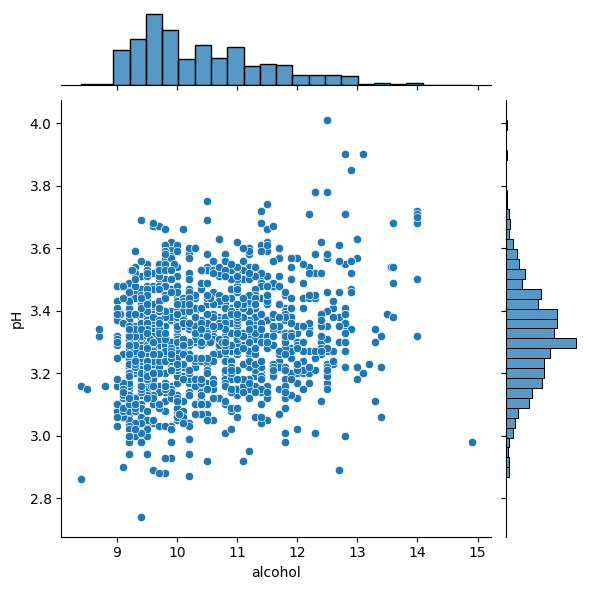

In [ ]:
sns.jointplot(x='alcohol',y='pH',data=df)

Multivariate Analysis

Coorelation Heatmap

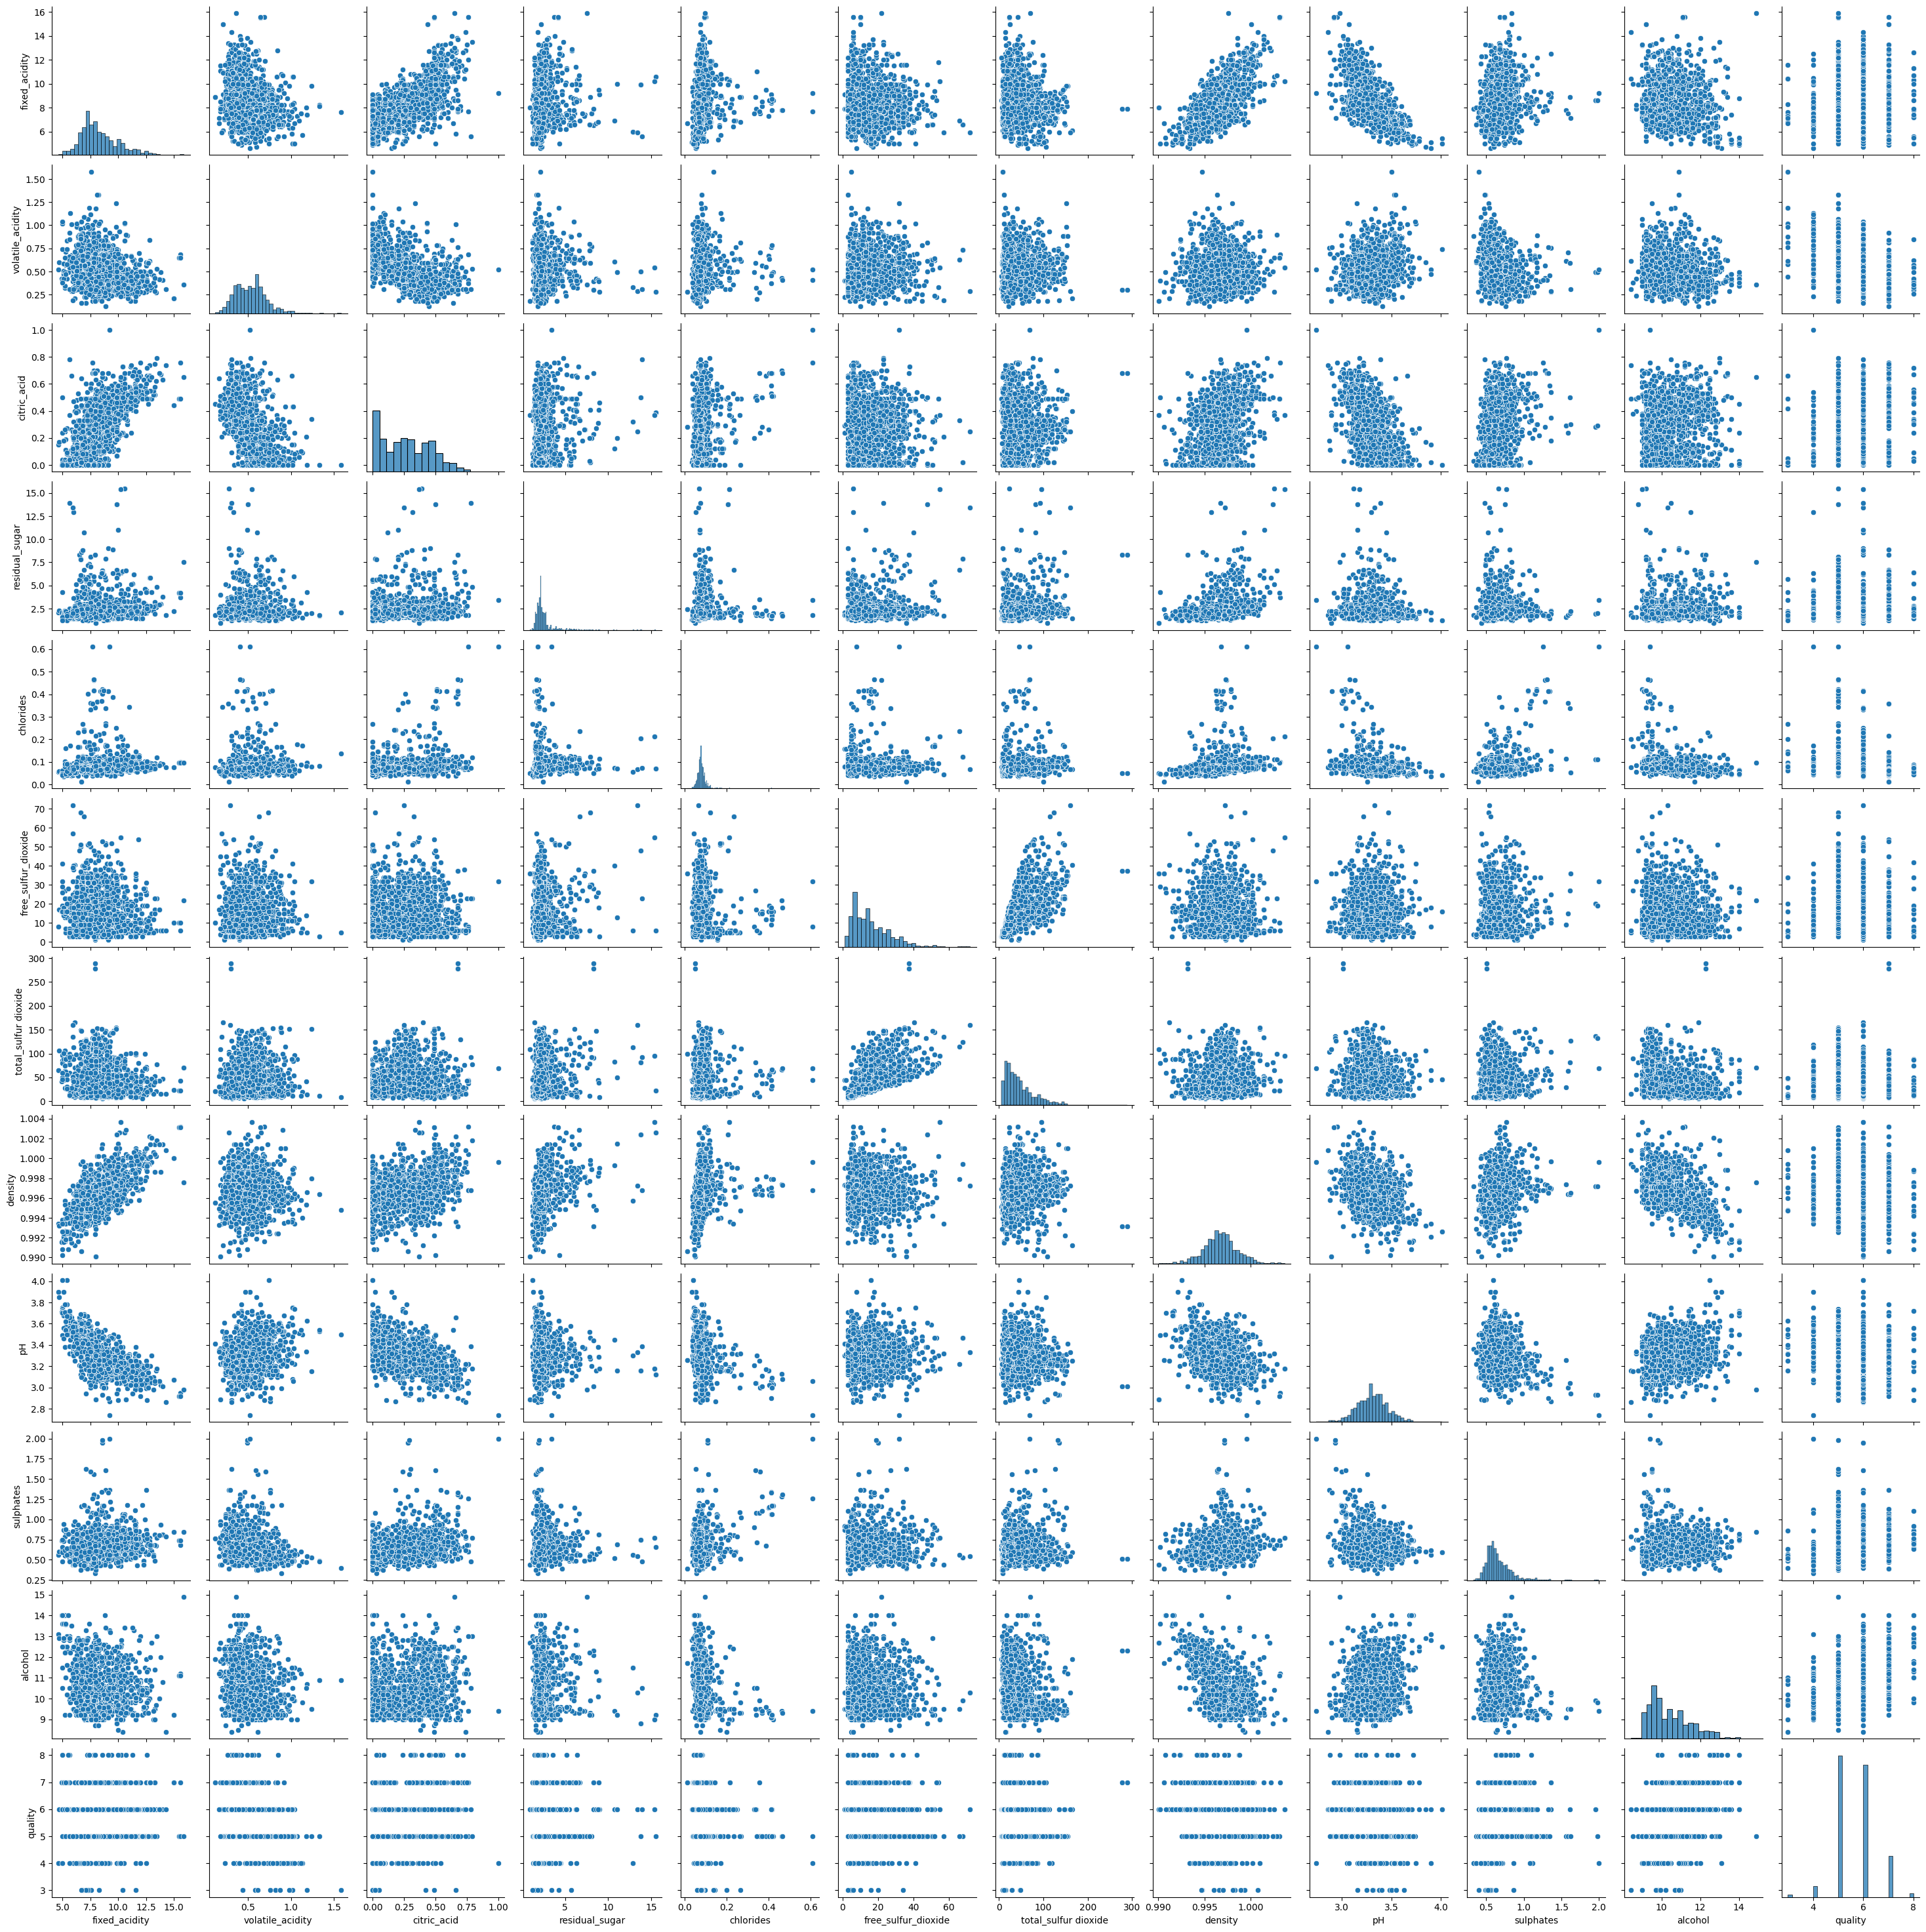

In [ ]:
sns.pairplot(df)

<Axes: >

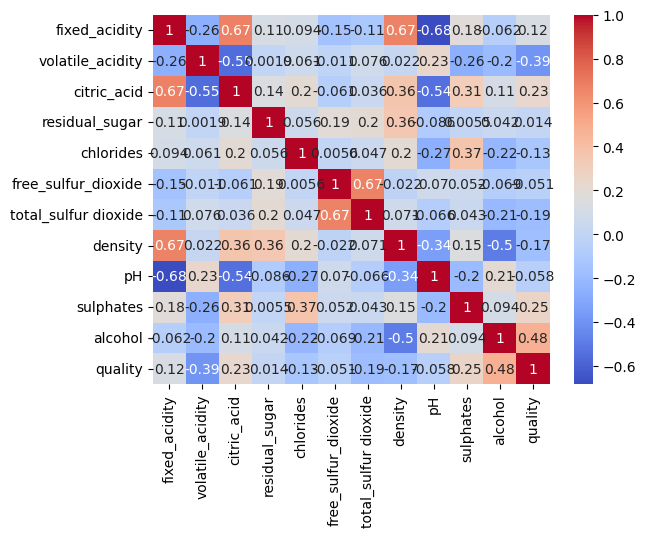

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Outlier Detection and Removal

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#fixed_cidity Column

f1 = df.fixed_acidity.quantile(0.25) #Q1
f3 = df.fixed_acidity.quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
print(f1)
print(f3)
print(IQR_f)
print(upper_limit_f)
print(lower_limit_f)

7.1
9.2
2.0999999999999996
12.349999999999998
3.95


<Axes: >

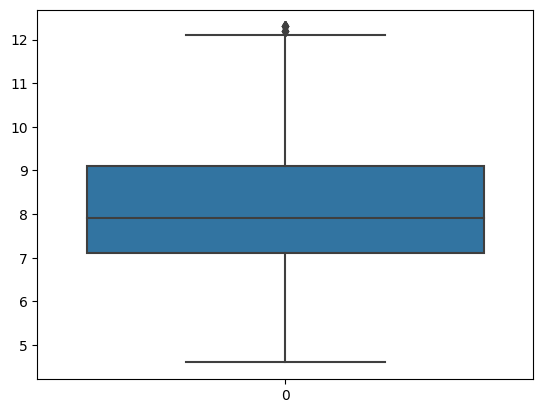

In [ ]:
df=df[(df.fixed_acidity<upper_limit_f) & (df.fixed_acidity>lower_limit_f)]
sns.boxplot(df.fixed_acidity)

In [ ]:
fx_01=df.fixed_acidity.quantile(0.01)
fx_98=df.fixed_acidity.quantile(0.98)
print(fx_1)
print(fx_9)

5.2
11.8


<Axes: >

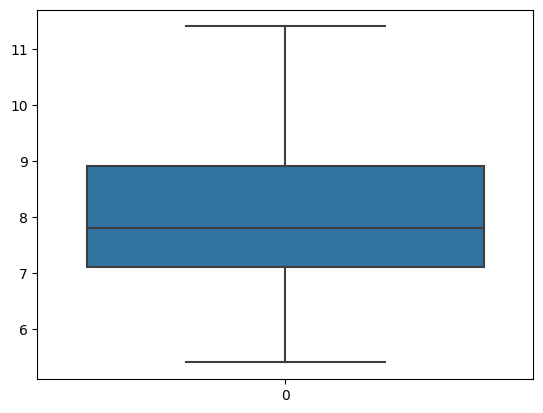

In [ ]:
df=df[(df.fixed_acidity>=fx_01) & (df.fixed_acidity<=fx_98)]
sns.boxplot(df.fixed_acidity)

In [ ]:
#volatile_acidity Column

v1 = df.volatile_acidity.quantile(0.25) #Q1
v3 = df.volatile_acidity.quantile(0.75) #Q3
IQR_v = v3 - v1
upper_limit_v = v3+(1.5)*(IQR_v)
lower_limit_v = v1-(1.5)*(IQR_v)
print(v1)
print(v3)
print(IQR_v)
print(upper_limit_v)
print(lower_limit_v)

0.4
0.64
0.24
1.0
0.040000000000000036


<Axes: >

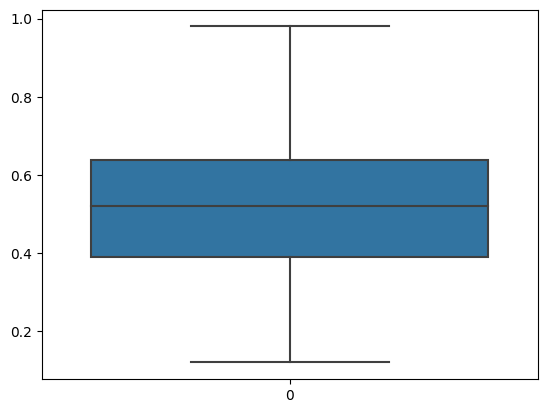

In [ ]:
df=df[(df.volatile_acidity<upper_limit_v) & (df.volatile_acidity>lower_limit_v)]
sns.boxplot(df.volatile_acidity)

In [ ]:
#citric_acid Column

c1 = df.citric_acid.quantile(0.25) #Q1
c3 = df.citric_acid.quantile(0.75) #Q3
IQR_c = c3 - c1
upper_limit_c = c3+(1.5)*(IQR_c)
lower_limit_c = c1-(1.5)*(IQR_c)
print(c1)
print(c3)
print(IQR_c)
print(upper_limit_c)
print(lower_limit_c)

0.09
0.4
0.31000000000000005
0.8650000000000001
-0.3750000000000001


<Axes: >

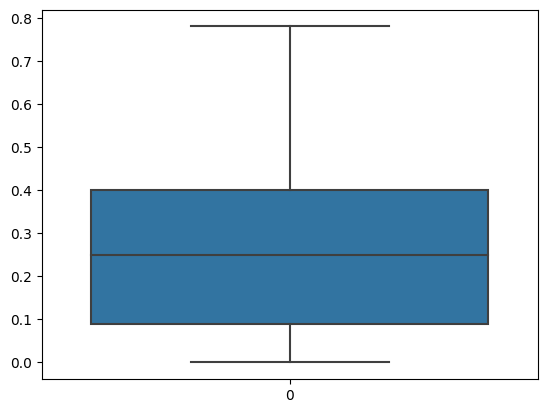

In [ ]:
df=df[(df.citric_acid<upper_limit_c) & (df.citric_acid>lower_limit_c)]
sns.boxplot(df.citric_acid)

In [ ]:
#residual_sugar Column

r1 = df.residual_sugar.quantile(0.25) #Q1
r3 = df.residual_sugar.quantile(0.75) #Q3
IQR_r = r3 - r1
upper_limit_r = r3+(1.5)*(IQR_r)
lower_limit_r = r1-(1.5)*(IQR_r)
print(r1)
print(r3)
print(IQR_r)
print(upper_limit_r)
print(lower_limit_r)

1.9
2.6
0.7000000000000002
3.6500000000000004
0.8499999999999996


<Axes: >

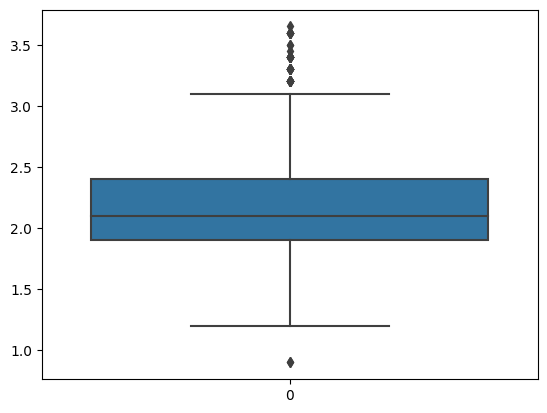

In [ ]:
df=df[(df.residual_sugar<upper_limit_r) & (df.residual_sugar>lower_limit_r)]
sns.boxplot(df.residual_sugar)

In [ ]:
rs_02=df.residual_sugar.quantile(0.02)
rs_96=df.residual_sugar.quantile(0.96)
print(rs_02)
print(rs_96)

1.4
3.0


<Axes: >

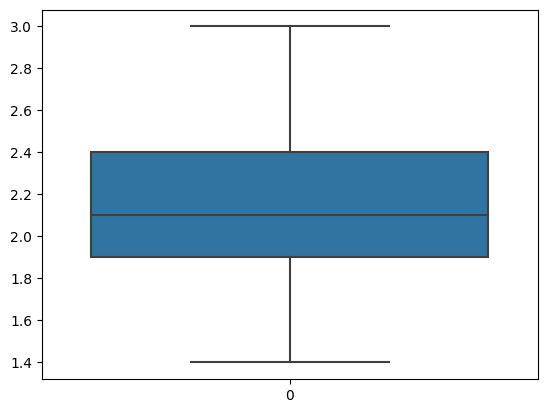

In [ ]:
df=df[(df.residual_sugar>=rs_02) & (df.residual_sugar<=rs_96)]
sns.boxplot(df.residual_sugar)

In [ ]:
#free_sulfur_dioxide Column

fs1 = df.free_sulfur_dioxide.quantile(0.25) #Q1
fs3 = df.free_sulfur_dioxide.quantile(0.75) #Q3
IQR_fs = fs3 - fs1
upper_limit_fs = fs3+(1.5)*(IQR_fs)
lower_limit_fs = fs1-(1.5)*(IQR_fs)
print(fs1)
print(fs3)
print(IQR_fs)
print(upper_limit_fs)
print(lower_limit_fs)

8.0
21.0
13.0
40.5
-11.5


<Axes: >

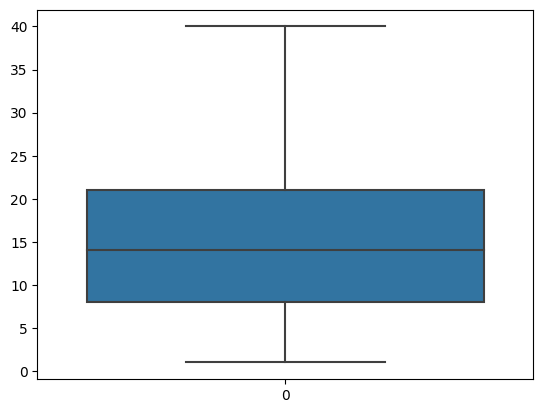

In [ ]:
df=df[(df.free_sulfur_dioxide<upper_limit_fs) & (df.free_sulfur_dioxide>lower_limit_fs)]
sns.boxplot(df.free_sulfur_dioxide)

In [ ]:
# density Column

d1 = df.density.quantile(0.25) #Q1
d3 = df.density.quantile(0.75) #Q3
IQR_d = d3 - d1
upper_limit_d = d3+(1.5)*(IQR_d)
lower_limit_d = d1-(1.5)*(IQR_d)
print(d1)
print(d3)
print(IQR_d)
print(upper_limit_d)
print(lower_limit_d)

0.99551
0.99744
0.0019299999999999873
1.000335
0.992615


<Axes: >

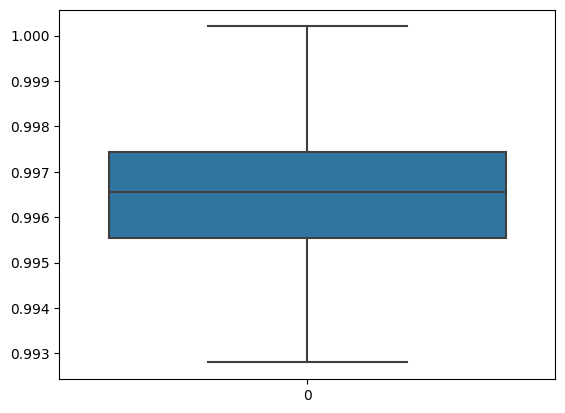

In [ ]:
df=df[(df.density<upper_limit_d) & (df.density>lower_limit_d)]
sns.boxplot(df.density)

In [ ]:
d_01=df.density.quantile(0.01)
d_99=df.density.quantile(0.99)
print(d_01)
print(d_99)

0.9933006
0.9998


<Axes: >

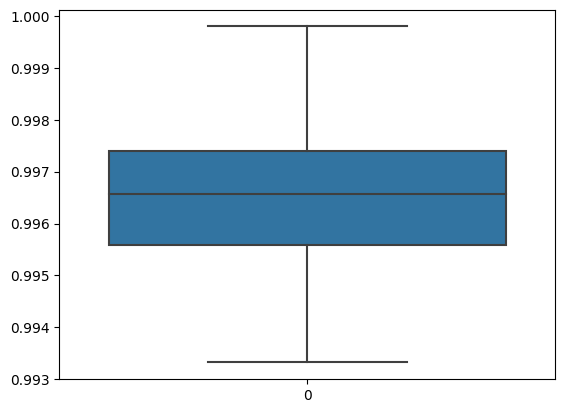

In [ ]:
df=df[(df.density>=d_01) & (df.density<=d_99)]
sns.boxplot(df.density)

In [ ]:
#chlorides Column

ch1 = df.chlorides.quantile(0.25) #Q1
ch3 = df.chlorides.quantile(0.75) #Q3
IQR_ch = ch3 - ch1
upper_limit_ch = ch3+(1.5)*(IQR_ch)
lower_limit_ch = ch1-(1.5)*(IQR_ch)
print(ch1)
print(ch3)
print(IQR_ch)
print(upper_limit_ch)
print(lower_limit_ch)

0.071
0.089
0.018000000000000002
0.11599999999999999
0.04399999999999999


<Axes: >

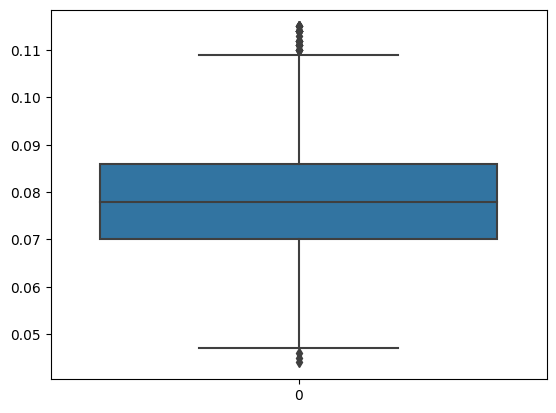

In [ ]:
df=df[(df.chlorides<upper_limit_ch) & (df.chlorides>lower_limit_ch)]
sns.boxplot(df.chlorides)

In [ ]:
ch_01=df.chlorides.quantile(0.01)
ch_97=df.chlorides.quantile(0.97)
print(ch_01)
print(ch_97)

0.049
0.107


<Axes: >

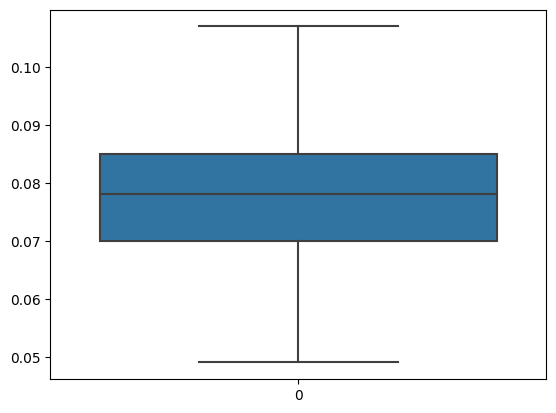

In [ ]:
df=df[(df.chlorides>=ch_01) & (df.chlorides<=ch_97)]
sns.boxplot(df.chlorides)

## Machine Learning Model building

In [ ]:
X =df.iloc[:,:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
Y =df.quality
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Label Binarisation (Conidering alcohol quality > 7.5 as good quality and assigning '1' to it else assigning '0')

In [ ]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7.5 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1593    0
1594    0
1595    0
1596    0
1597    0
Name: quality, Length: 1047, dtype: int64


Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
X_train.shape

(732, 11)

In [ ]:
X_test.shape

(315, 11)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1047,) (732,) (315,)


## Evaluating the Model

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=2,splitter='best',criterion='entropy')
model_1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
d_y_predict = model_1.predict(X_test)
d_y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
d_y_predict_train = model_1.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(Y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,d_y_predict_train))

Testing Accuracy =  0.9904761904761905
Training Accuracy =  0.9918032786885246


Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 =RandomForestClassifier(n_estimators=200,criterion='entropy')
model_2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
r_y_predict = model_2.predict(X_test)
r_y_predict_train = model_2.predict(X_train)

In [ ]:
print('Testing Accuracy = ', accuracy_score(Y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,r_y_predict_train))

Testing Accuracy =  0.9904761904761905
Training Accuracy =  1.0


Naive Bayesian Classification Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_pred2 = gnb.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
gnb_acc=accuracy_score(Y_test,y_pred2)
gnb_acc

0.9714285714285714

## Testing with random observations

In [ ]:
input_data = [9.9, 1.0, 0, 5.0, 0.05, 40, 100, 0.85, 6.5, 0.63, 12.5]

In [ ]:
prediction = model_1.predict([input_data])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

*According to "decision tree classifier" model, the above random observation gives prediction "array([0])" i.e., bad quality alcohol*

In [ ]:
prediction2 = model_2.predict([input_data])
prediction2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

*According to "Random Forest classifier" model, the above random observation gives prediction "array([0])" i.e., bad quality alcohol*

In [ ]:
prediction3 = gnb.predict([input_data])
prediction3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

*According to "Naive Bayesian classifier" model, the above random observation gives prediction "array([0])" i.e., bad quality alcoho*l

# As a result for the same random observations, all the three models gave the "alchohol quality is BAD"